# Practical Deep Reinforcement Learning Approach for Stock Trading

# Section 1 Install Packages

In [2]:
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git

  Cloning https://github.com/AI4Finance-Foundation/FinRL.git to /private/var/folders/vv/phvh_y614sn87g3_r69dtr9w0000gn/T/pip-req-build-ibnirkxc
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/FinRL.git /private/var/folders/vv/phvh_y614sn87g3_r69dtr9w0000gn/T/pip-req-build-ibnirkxc
  Resolved https://github.com/AI4Finance-Foundation/FinRL.git to commit 33a8dde33c967659470409c577dcee31e2a7f481
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /private/var/folders/vv/phvh_y614sn87g3_r69dtr9w0000gn/T/pip-install-vv_82rc2/elegantrl_ab02b7d56f0948fe8afdf5589d616b90
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git /private/var/folders/vv/phvh_y614sn87g3_r69dtr9w0000gn/T/pip-install-vv_82rc2/elegantrl_ab02b7d56f0948fe8afdf5589d616b90
  

In [23]:
import pandas as pd
import yfinance as yf

from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl import config_tickers
from finrl.config import INDICATORS

import itertools

# Section 2 Data Preparation

## Section 2.1 Data Downloader

[yfinance](https://github.com/ranaroussi/yfinance) is an open-source library that provides APIs fetching historical data form Yahoo Finance. In FinRL, we have a class called [YahooDownloader](https://github.com/AI4Finance-Foundation/FinRL/blob/master/finrl/meta/preprocessor/yahoodownloader.py) that use yfinance to fetch data from Yahoo Finance.

**OHLCV**: Data downloaded are in the form of OHLCV, corresponding to **open, high, low, close, volume,** respectively. OHLCV is important because they contain most of numerical information of a stock in time series. From OHLCV, traders can get further judgement and prediction like the momentum, people's interest, market trends, etc.

### Data for a single ticker (can skip)

Here we provide two ways to fetch data with single ticker, let's take Apple Inc. (AAPL) as an example.

#### Using yfinance

In [24]:
aapl_df_yf = yf.download(tickers = "aapl", start='2020-01-01', end='2020-01-31')

[*********************100%%**********************]  1 of 1 completed


In [25]:
aapl_df_yf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.249016,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.536888,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.114891,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.771027,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.941643,132079200


#### Using FinRL

In FinRL's YahooDownloader, we modified the data frame to the form that convenient for further data processing process. We use adjusted close price instead of close price, and add a column representing the day of a week (0-4 corresponding to Monday-Friday).

In [26]:
aapl_df_finrl = YahooDownloader(start_date = '2020-01-01',
                                end_date = '2020-01-31',
                                ticker_list = ['aapl']).fetch_data()

[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (20, 8)


In [27]:
aapl_df_finrl.head()

,date,open,high,low,close,volume,tic,day
0,2020-01-02,74.059998,75.150002,73.797501,73.249031,135480400,aapl,3
1,2020-01-03,74.287498,75.144997,74.125000,72.536888,146322800,aapl,4
2,2020-01-06,73.447502,74.989998,73.187500,73.114891,118387200,aapl,0
3,2020-01-07,74.959999,75.224998,74.370003,72.771034,108872000,aapl,1
4,2020-01-08,74.290001,76.110001,74.290001,73.941635,132079200,aapl,2


### Data for the chosen tickers

In [28]:
TRAIN_START_DATE = '2009-01-01'
TRAIN_END_DATE = '2015-01-01'
TRADE_START_DATE = '2016-01-01'
TRADE_END_DATE = '2018-01-01'

In [29]:
df_raw = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TRADE_END_DATE,
                     ticker_list = config_tickers.DOW_30_TICKER).fetch_data()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******


1 Failed download:
['DOW']: Exception("%ticker%: Data doesn't exist for startDate = 1230786000, endDate = 1514782800")



Shape of DataFrame:  (65685, 8)


In [30]:
df_raw.head()

,date,open,high,low,close,volume,tic,day
0,2009-01-02,3.067143,3.251429,3.041429,2.751009,746015200,AAPL,4
1,2009-01-02,58.590000,59.080002,57.750000,43.073925,6547900,AMGN,4
2,2009-01-02,18.570000,19.520000,18.400000,15.256276,10955700,AXP,4
3,2009-01-02,42.799999,45.560001,42.779999,33.941093,7010200,BA,4
4,2009-01-02,44.910000,46.980000,44.709999,31.254061,7117200,CAT,4


## Section 2.2 Preprocess Data
We need to check for missing data and do feature engineering to convert the data point into a state.

* **Adding technical indicators**. In practical trading, various information needs to be taken into account, such as historical prices, current holding shares, technical indicators, etc. Here, we demonstrate two trend-following technical indicators: MACD and RSI. Moving average convergence/divergence (MACD) is one of the most commonly used indicator showing bull and bear market. Its calculation is based on EMA (Exponential Moving Average indicator, measuring trend direction over a period of time.)

* **Adding turbulence index**. Risk-aversion reflects whether an investor prefers to protect the capital. It also influences one's trading strategy when facing different market volatility level. To control the risk in a worst-case scenario, such as financial crisis of 2007–2008, we may consider the turbulence index that measures extreme fluctuation of asset price.

In [31]:
fe = FeatureEngineer(use_technical_indicator=True,
                     tech_indicator_list = INDICATORS,
                     use_vix=True,
                     use_turbulence=True,
                     user_defined_feature = False)

processed = fe.preprocess_data(df_raw)

Successfully added technical indicators
[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (2264, 8)
Successfully added vix
Successfully added turbulence index


In [32]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

In [33]:
processed_full.head()

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2009-01-02,AAPL,3.067143,3.251429,3.041429,2.751009,746015200.0,4.0,0.0,2.973258,2.644865,100.0,66.666667,100.0,2.751009,2.751009,39.189999,0.0
1,2009-01-02,AMGN,58.590000,59.080002,57.750000,43.073925,6547900.0,4.0,0.0,2.973258,2.644865,100.0,66.666667,100.0,43.073925,43.073925,39.189999,0.0
2,2009-01-02,AXP,18.570000,19.520000,18.400000,15.256276,10955700.0,4.0,0.0,2.973258,2.644865,100.0,66.666667,100.0,15.256276,15.256276,39.189999,0.0
3,2009-01-02,BA,42.799999,45.560001,42.779999,33.941093,7010200.0,4.0,0.0,2.973258,2.644865,100.0,66.666667,100.0,33.941093,33.941093,39.189999,0.0
4,2009-01-02,CAT,44.910000,46.980000,44.709999,31.254061,7117200.0,4.0,0.0,2.973258,2.644865,100.0,66.666667,100.0,31.254061,31.254061,39.189999,0.0


## Section 2.3 Save Data

In [34]:
# Split the data for training and trading
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
# Save data to csv file
train.to_csv('train_data.csv')
trade.to_csv('trade_data.csv')

# Section 3 Training

The core element in reinforcement learning are **agent** and **environment**. You can understand RL as the following process: 

The agent is active in a world, which is the environment. It observe its current condition as a **state**, and is allowed to do certain **actions**. After the agent execute an action, it will arrive at a new state. At the same time, the environment will have feedback to the agent called **reward**, a numerical signal that tells how good or bad the new state is. 

The goal of agent is to get as much cumulative reward as possible. Reinforcement learning is the method that agent learns to improve its behavior and achieve that goal.

To achieve this in Python, we follow the OpenAI gym style to build the stock data into environment.

state-action-reward are specified as follows:

* **State s**: The state space represents an agent's perception of the market environment. Just like a human trader analyzing various information, here our agent passively observes the price data and technical indicators based on the past data. It will learn by interacting with the market environment (usually by replaying historical data).

* **Action a**: The action space includes allowed actions that an agent can take at each state. For example, a ∈ {−1, 0, 1}, where −1, 0, 1 represent
selling, holding, and buying. When an action operates multiple shares, a ∈{−k, ..., −1, 0, 1, ..., k}, e.g.. "Buy 10 shares of AAPL" or "Sell 10 shares of AAPL" are 10 or −10, respectively

* **Reward function r(s, a, s′)**: Reward is an incentive for an agent to learn a better policy. For example, it can be the change of the portfolio value when taking a at state s and arriving at new state s',  i.e., r(s, a, s′) = v′ − v, where v′ and v represent the portfolio values at state s′ and s, respectively


**Market environment**: 30 constituent stocks of Dow Jones Industrial Average (DJIA) index. Accessed at the starting date of the testing period.

In [35]:
from stable_baselines3.common.logger import configure

from finrl.agents.stablebaselines3.models import DRLAgent
from finrl.config import INDICATORS, TRAINED_MODEL_DIR, RESULTS_DIR
from finrl.main import check_and_make_directories
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv

check_and_make_directories([TRAINED_MODEL_DIR])

## Section 3.1 Build the environment

In [36]:
train = pd.read_csv('train_data.csv')
train = train.set_index(train.columns[0])
train.index.names = ['']
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 10000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}

e_train_gym = StockTradingEnv(df = train, **env_kwargs)
env_train, _ = e_train_gym.get_sb_env()

## Section 3.2 Train RL agent 
RL agents are from **[Stable Baselines 3](https://stable-baselines3.readthedocs.io/en/master/)**. We use **[SAC](https://arxiv.org/abs/1801.01290)** as an example below.

In [58]:
# agent = DRLAgent(env = env_train)
# SAC_PARAMS = {
#     "batch_size": 128,
#     "buffer_size": 100000,
#     "learning_rate": 0.0001,
#     "learning_starts": 100,
#     "ent_coef": "auto_0.1",
# }

# model_sac = agent.get_model("sac", model_kwargs = SAC_PARAMS)
# # set up logger
# tmp_path = RESULTS_DIR + '/sac'
# new_logger_sac = configure(tmp_path, ["stdout", "csv", "tensorboard"])
# # Set new logger
# model_sac.set_logger(new_logger_sac)

# trained_sac = agent.train_model(model=model_sac, 
#                              tb_log_name='sac',
#                              total_timesteps=100000)
# # save model
# trained_sac.save(TRAINED_MODEL_DIR + "/agent_sac") 

# you may also use other RL algorithms such as A2C, DDPG, PPO, TD3

# # A2C https://arxiv.org/abs/1602.01783
# agent = DRLAgent(env = env_train)
# model_a2c = agent.get_model("a2c")
# # set up logger
# tmp_path = RESULTS_DIR + '/a2c'
# new_logger_a2c = configure(tmp_path, ["stdout", "csv", "tensorboard"])
# # Set new logger
# model_a2c.set_logger(new_logger_a2c)
# trained_a2c = agent.train_model(model=model_a2c, 
#                              tb_log_name='a2c',
#                              total_timesteps=50000) 
# trained_a2c.save(TRAINED_MODEL_DIR + "/agent_a2c")

# DDPG https://arxiv.org/abs/1509.02971
agent = DRLAgent(env = env_train)
model_ddpg = agent.get_model("ddpg")
# set up logger
tmp_path = RESULTS_DIR + '/ddpg'
new_logger_ddpg = configure(tmp_path, ["stdout", "csv", "tensorboard"])
# Set new logger
model_ddpg.set_logger(new_logger_ddpg)
trained_ddpg = agent.train_model(model=model_ddpg, 
                             tb_log_name='ddpg',
                             total_timesteps=50000)
trained_ddpg.save(TRAINED_MODEL_DIR + "/agent_ddpg")

# # PPO https://arxiv.org/abs/1707.06347
# agent = DRLAgent(env = env_train)
# PPO_PARAMS = {
#     "n_steps": 2048,
#     "ent_coef": 0.01,
#     "learning_rate": 0.00025,
#     "batch_size": 128,
# }
# model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)
# # set up logger
# tmp_path = RESULTS_DIR + '/ppo'
# new_logger_ppo = configure(tmp_path, ["stdout", "csv", "tensorboard"])
# # Set new logger
# model_ppo.set_logger(new_logger_ppo)
# trained_ppo = agent.train_model(model=model_ppo, 
#                              tb_log_name='ppo',
#                              total_timesteps=200000) 
# trained_ppo.save(TRAINED_MODEL_DIR + "/agent_ppo") 

# # TD3 https://arxiv.org/pdf/1802.09477
# agent = DRLAgent(env = env_train)
# TD3_PARAMS = {"batch_size": 100, 
#               "buffer_size": 1000000, 
#               "learning_rate": 0.001}

# model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)
# # set up logger
# tmp_path = RESULTS_DIR + '/td3'
# new_logger_td3 = configure(tmp_path, ["stdout", "csv", "tensorboard"])
# # Set new logger
# model_td3.set_logger(new_logger_td3)
# trained_td3 = agent.train_model(model=model_td3, 
#                              tb_log_name='td3',
#                              total_timesteps=50000) 
# trained_td3.save(TRAINED_MODEL_DIR + "/agent_td3")


{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device
Logging to results/ddpg
day: 1509, episode: 70
begin_total_asset: 10000.00
end_total_asset: 28628.43
total_reward: 18628.43
total_cost: 9.99
total_trades: 25653
Sharpe: 1.046
------------------------------------
| time/              |             |
|    episodes        | 4           |
|    fps             | 69          |
|    time_elapsed    | 86          |
|    total_timesteps | 6040        |
| train/             |             |
|    actor_loss      | 7.14        |
|    critic_loss     | 0.00868     |
|    learning_rate   | 0.001       |
|    n_updates       | 4530        |
|    reward          | -0.03169232 |
------------------------------------
------------------------------------
| time/              |             |
|    episodes        | 8           |
|    fps             | 63          |
|    time_elapsed    | 190         |
|    total_timesteps | 12080       |
| train/             |             |
| 

# Section 4 Backtesting

In [38]:
import matplotlib.pyplot as plt
import numpy as np

from stable_baselines3 import SAC, A2C, DDPG, PPO, TD3

%matplotlib inline

In [39]:
train = pd.read_csv('train_data.csv')
trade = pd.read_csv('trade_data.csv')

train = train.set_index(train.columns[0])
train.index.names = ['']
trade = trade.set_index(trade.columns[0])
trade.index.names = ['']

trained_sac = SAC.load(TRAINED_MODEL_DIR + "/agent_sac") 

## Section 4.1 RL (Out-of-sample performance)

In [59]:
e_trade_gym = StockTradingEnv(df = trade, risk_indicator_col='vix', **env_kwargs)
df_account_value_sac, df_actions_sac = DRLAgent.DRL_prediction(
    model=trained_sac, 
    environment = e_trade_gym)
df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
    model=trained_ddpg, 
    environment = e_trade_gym)

hit end!
hit end!


## Section 4.2 Mean-variance optimization

In [66]:
from pypfopt.efficient_frontier import EfficientFrontier
# Some helper functions
def process_df_for_mvo(df):
  return df.pivot(index="date", columns="tic", values="close")

def StockReturnsComputing(StockPrice, Rows, Columns): 
  StockReturn = np.zeros([Rows-1, Columns]) 
  for j in range(Columns):        # j: Assets 
    for i in range(Rows-1):     # i: Daily Prices 
      StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])* 100 
      
  return StockReturn

In [49]:
StockData = process_df_for_mvo(train)
TradeData = process_df_for_mvo(trade)

# compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

# compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
 
# set precision for printing results
np.set_printoptions(precision=3, suppress = True)

In [87]:
ef_mean = EfficientFrontier(meanReturns, covReturns, weight_bounds=(0, 0.1))
raw_weights_mean = ef_mean.max_sharpe()
cleaned_weights_mean = ef_mean.clean_weights()
mvo_weights = np.array([10000 * cleaned_weights_mean[i] for i in range(len(cleaned_weights_mean))])

LastPrice = np.array([1/p for p in StockData.tail(1).to_numpy()[0]])
Initial_Portfolio = np.multiply(mvo_weights, LastPrice)

Portfolio_Assets = TradeData @ Initial_Portfolio
MVO_result = pd.DataFrame(Portfolio_Assets, columns=["Mean Var"])

## Section 4.3 DJIA index

In [88]:
df_dji = YahooDownloader(
    start_date=TRADE_START_DATE, end_date=TRADE_END_DATE, ticker_list=["dji"]
).fetch_data()
df_dji = df_dji[["date", "close"]]
fst_day = df_dji["close"][0]
dji = pd.merge(
    df_dji["date"],
    df_dji["close"].div(fst_day).mul(10000),
    how="outer",
    left_index=True,
    right_index=True,
).set_index("date")

[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (503, 8)


## Section 4.4 Results 

In [89]:
df_result_sac = (
    df_account_value_sac.set_index(df_account_value_sac.columns[0])
)
df_result_ddpg = (
    df_account_value_ddpg.set_index(df_account_value_ddpg.columns[0])
)
result = pd.DataFrame(
    {
        "ddpg": df_result_ddpg["account_value"],
        "sac": df_result_sac["account_value"],
        "mvo": MVO_result["Mean Var"],
        "dji": dji["close"],
    }
)

<AxesSubplot:xlabel='date'>

<Figure size 1500x500 with 0 Axes>

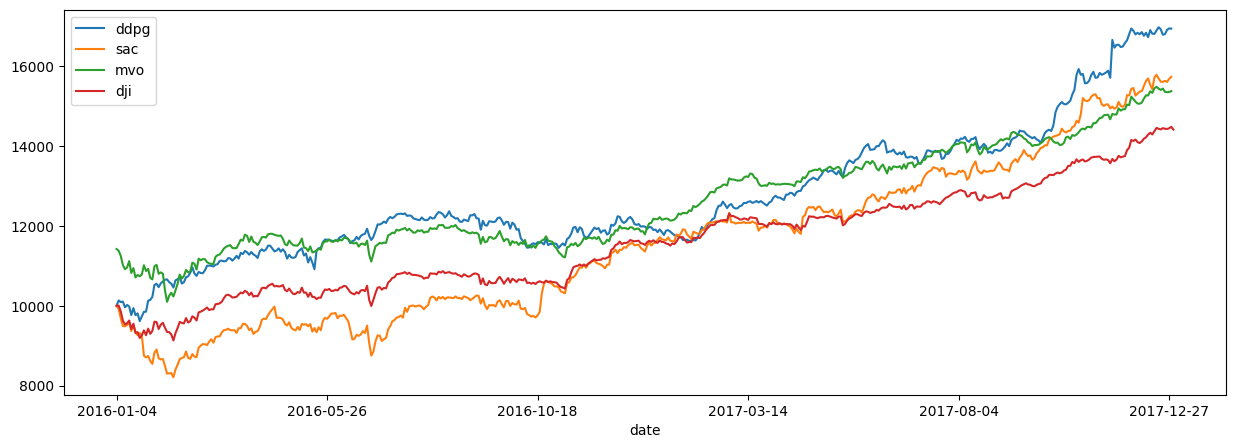

In [90]:
plt.rcParams["figure.figsize"] = (15,5)
plt.figure()
result.plot()